In [1]:
path='ch02/usagov_bitly_data2012-03-16-1331923249.txt'
import json
records = [json.loads(line) for line in  open(path)]


In [2]:
records

[{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  u'al': u'en-US,en;q=0.8',
  u'c': u'US',
  u'cy': u'Danvers',
  u'g': u'A6qOVH',
  u'gr': u'MA',
  u'h': u'wfLQtf',
  u'hc': 1331822918,
  u'hh': u'1.usa.gov',
  u'l': u'orofrog',
  u'll': [42.576698, -70.954903],
  u'nk': 1,
  u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  u't': 1331923247,
  u'tz': u'America/New_York',
  u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {u'a': u'GoogleMaps/RochesterNY',
  u'c': u'US',
  u'cy': u'Provo',
  u'g': u'mwszkS',
  u'gr': u'UT',
  u'h': u'mwszkS',
  u'hc': 1308262393,
  u'hh': u'j.mp',
  u'l': u'bitly',
  u'll': [40.218102, -111.613297],
  u'nk': 0,
  u'r': u'http://www.AwareMap.com/',
  u't': 1331923249,
  u'tz': u'America/Denver',
  u'u': u'http://www.monroecounty.gov/etc/911/rss.php'},
 {u'a': u'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NE

In [3]:
# 获取时区
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

# 1  遍历计数
def get_counts(sequence):
    coutns = {}
    for x in sequence:
        if x in coutns:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
# 2 使用标准库计数
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts
# 3 使用collections.Counter类
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)


[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

In [8]:
# 使用pandas对时区进行计数
from pandas import DataFrame,Series
import pandas as pd; import numpy as np
frame = DataFrame(records)
tz_counts = frame['tz'].value_counts() #value_counts 方法
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [5]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

Populating the interactive namespace from numpy and matplotlib


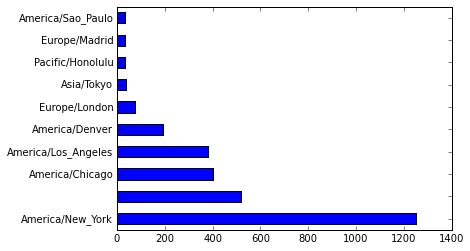

In [22]:
%pylab inline
tz_counts[:10].plot(kind='barh', rot=0)

In [12]:
frame['a'][1]
frame['a'][50]
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [13]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [14]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [15]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [16]:
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [17]:
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [18]:
# 用于升序排列
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [19]:
count_subset =agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


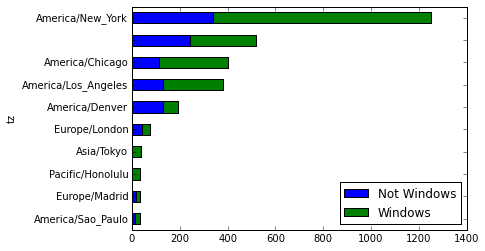

In [21]:
%pylab inline
count_subset.plot(kind='barh', stacked=True)

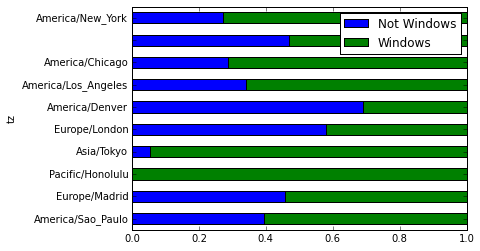

In [23]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)